<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/CNN-CIFAR10-Objects-Classification/blob/main/CNN_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [7]:
def showImages(x, y, iterations):
  plt.figure(figsize=(20,10))
  cols = 20
  rows = int(iterations / cols)
  for i in range(0,iterations):
    plt.subplot(rows, cols, i+1)
    plt.imshow(x[i])
    plt.title(classes[y[i]])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

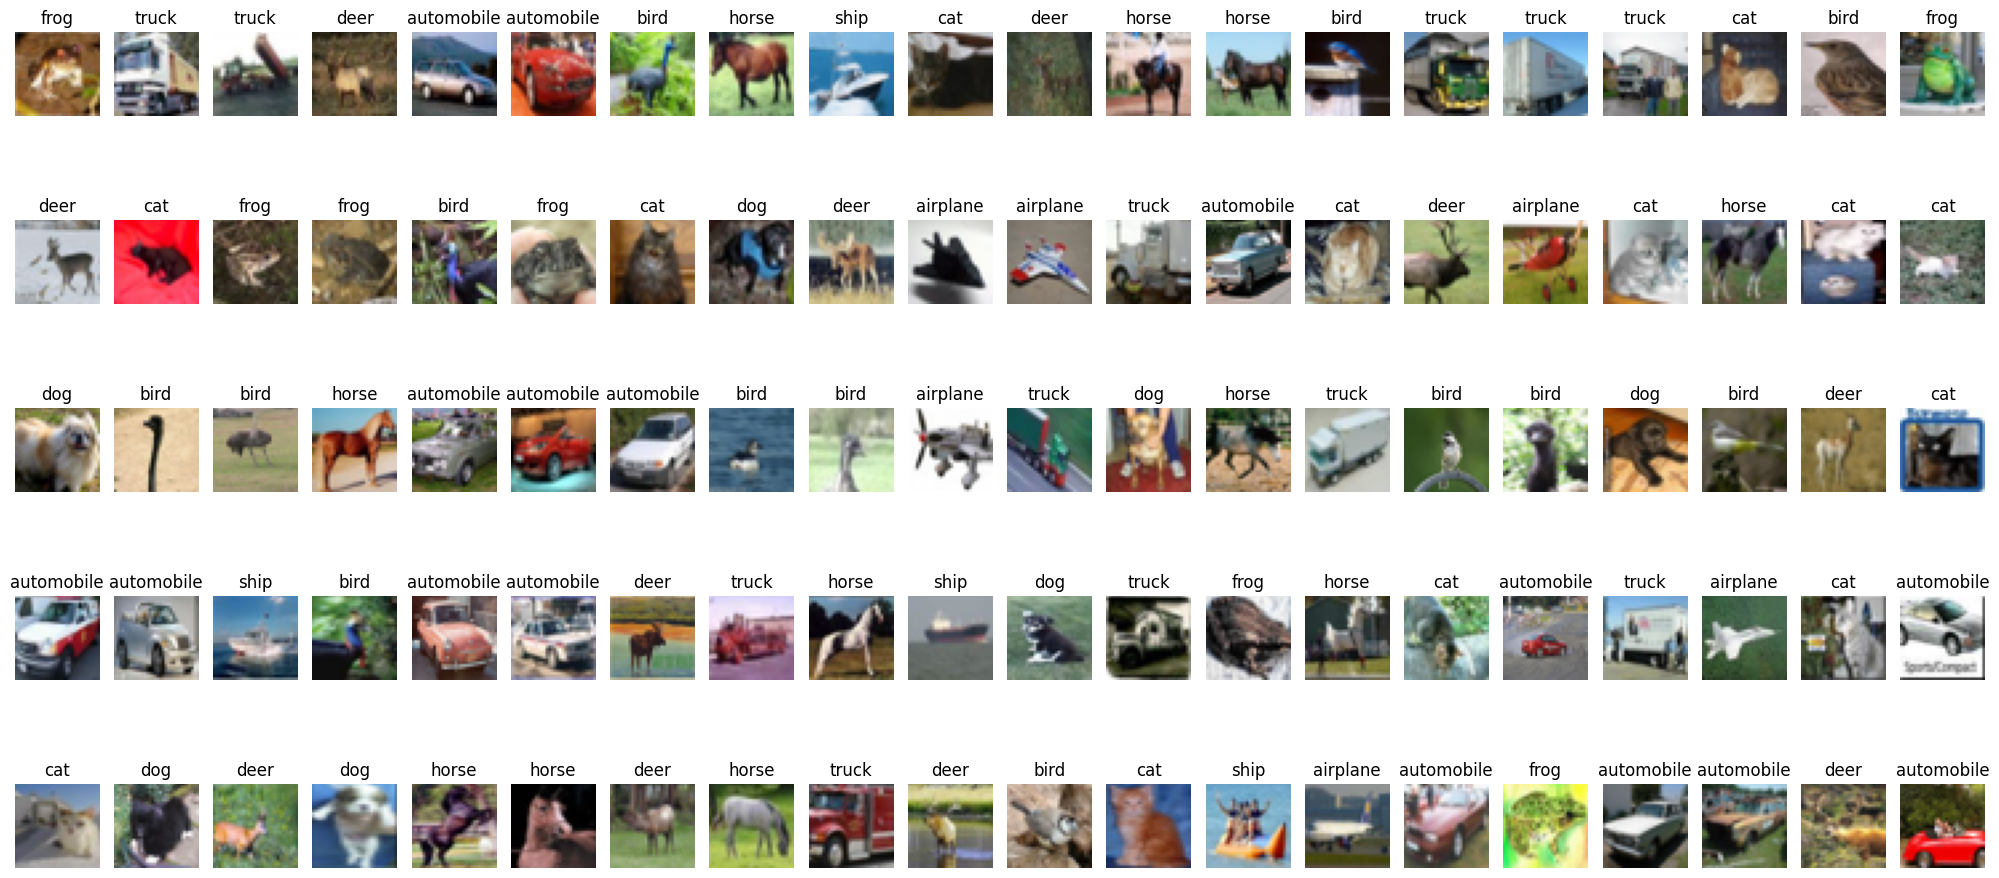

In [8]:
showImages(x_train, y_train, 100)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [69]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(128, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (2,2), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.2),

        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(
    loss=tf.keras.metrics.sparse_categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [71]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.4747 - loss: 1.6038 - val_accuracy: 0.6195 - val_loss: 1.1202
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7012 - loss: 0.8431 - val_accuracy: 0.7207 - val_loss: 0.8193
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7687 - loss: 0.6597 - val_accuracy: 0.7549 - val_loss: 0.7238
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8077 - loss: 0.5470 - val_accuracy: 0.7557 - val_loss: 0.7195
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8426 - loss: 0.4551 - val_accuracy: 0.7561 - val_loss: 0.7327
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8738 - loss: 0.3616 - val_accuracy: 0.7079 - val_loss: 1.0581
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8947 - loss: 0.3018 - val_accuracy: 0.7922 - val_loss: 0.6762
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9141 - loss: 

In [72]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [73]:
y_pred = np.argmax(y_pred, axis=1)

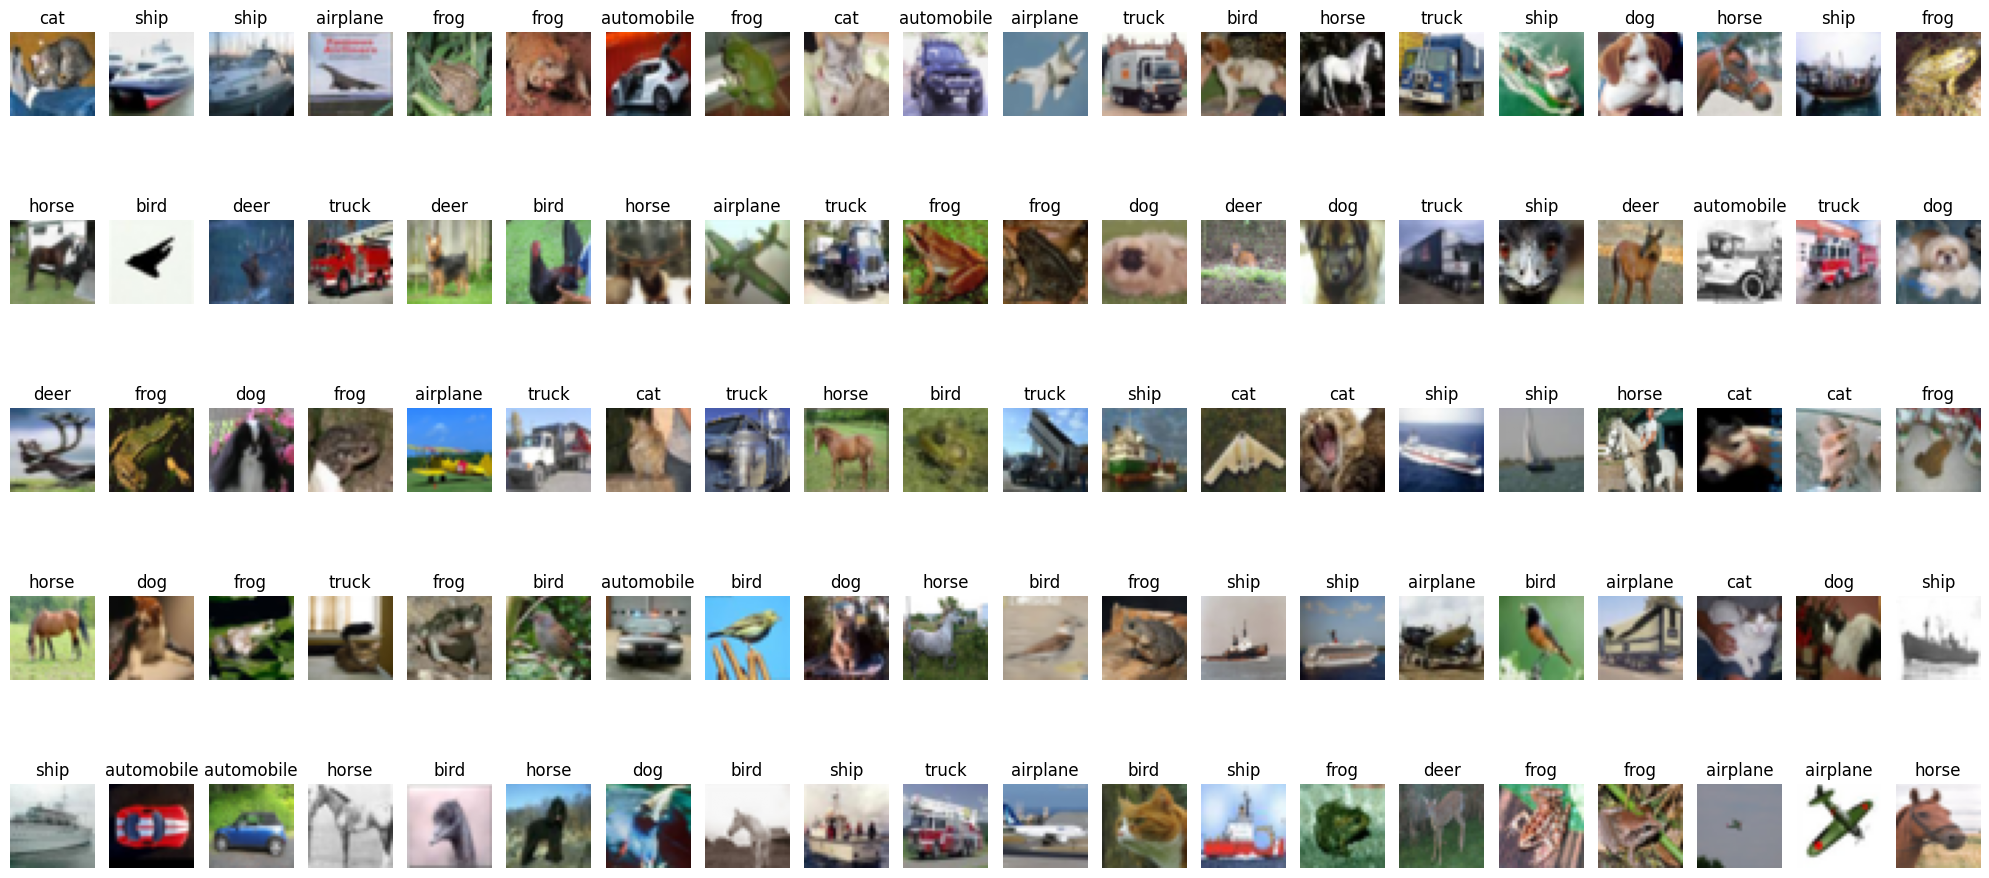

In [74]:
showImages(x_test, y_pred, 100)

In [75]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8121 - loss: 1.2014


[1.1660586595535278, 0.8167999982833862]

In [76]:
tf.keras.metrics.Accuracy()(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8167999982833862>

In [77]:
confusion_matrix(y_test, y_pred)

array([[869,   7,  36,  12,   6,   3,   4,   5,  39,  19],
       [ 15, 906,   2,   3,   1,   0,   2,   1,  23,  47],
       [ 51,   3, 782,  31,  35,  43,  32,  10,   8,   5],
       [ 38,  12,  78, 609,  41, 137,  43,  20,  13,   9],
       [ 18,   3,  78,  39, 765,  32,  29,  27,   6,   3],
       [ 10,   5,  55, 116,  23, 737,  17,  28,   5,   4],
       [ 11,   4,  61,  31,  15,  18, 840,   4,  13,   3],
       [ 13,   1,  29,  31,  27,  36,   2, 852,   1,   8],
       [ 34,   9,  10,   4,   1,   0,   6,   1, 926,   9],
       [ 24,  52,   3,   4,   1,   1,   0,   4,  29, 882]])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1000
           1       0.90      0.91      0.91      1000
           2       0.69      0.78      0.73      1000
           3       0.69      0.61      0.65      1000
           4       0.84      0.77      0.80      1000
           5       0.73      0.74      0.73      1000
           6       0.86      0.84      0.85      1000
           7       0.89      0.85      0.87      1000
           8       0.87      0.93      0.90      1000
           9       0.89      0.88      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

